## True Random dice tester

This is a notebook to make true random dice out of qubits.
This version includes numerous tools for testing functionality, including circuit diagrams, state vectors, and histograms.

In [154]:
%run utils.py

In [226]:
def handle_input(strg):
    #this func will take an input of the form 3d6
    #then split to calls = 3, size = 6
    split = strg.split("d")
    return(int(split[0]),int(split[1]))


def create_circuit(size):
    #take size as int, build a circuit with equal chances of each state
    qubits = int(np.ceil(np.log2(size)))
    qr = QuantumRegister(qubits,'x')
    cr = ClassicalRegister(qubits,'c')
    qc = QuantumCircuit(qr,cr)       
    for i in range (qubits):
        qc.h(i)        
    ### comment this out for testing
    qc.measure(qr,cr)
    return qc


def count_to_dec(count):
    #takes result.get_counts() and converts to a decimal result
    strg = str(count)
    split = strg.split("'")
    num = int(split[1],2)
    return (num+1)
    
    
    
def main(inp):
    #take in the roll text and run everything!
    calls,size = handle_input(inp)
    qc = create_circuit(size)
    simulator = AerSimulator()
    compiled_circuit = transpile(qc, simulator)
    total_roll = 0
    
    for _ in range (calls):
        reroll = True
        while reroll:
            #sym and run the circuit
            job = simulator.run(compiled_circuit, shots=1)
            result = job.result()
            roll = count_to_dec(result.get_counts())
            #reroll if result is too big
            if roll <= size:
                reroll = False
        total_roll+=roll
        
    print ("you rolled",inp,"and got a",total_roll,"!")


In [231]:
#main
main('1d20')

you rolled 1d20 and got a 8 !


# below is for testing only!

In [125]:
#has testing funcs
%run utils.py

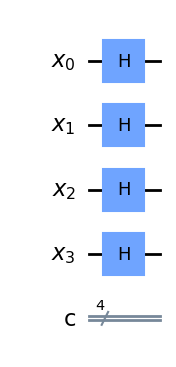

In [150]:
#drawing block
size = 16
qubits = int(np.log2(size))

qc = create_circuit(size)
qc.draw(output='mpl')

In [151]:
#print state
state = Statevector.from_int(0, 2**qubits)
state = state.evolve(qc)
print(beautify(state,qubits))

0.25 |0000> + 0.25 |0001> + 0.25 |0010> + 0.25 |0011> + 0.25 |0100> + 0.25 |0101> + 0.25 |0110> + 0.25 |0111> + 0.25 |1000> + 0.25 |1001> + 0.25 |1010> + 0.25 |1011> + 0.25 |1100> + 0.25 |1101> + 0.25 |1110> + 0.25 |1111>


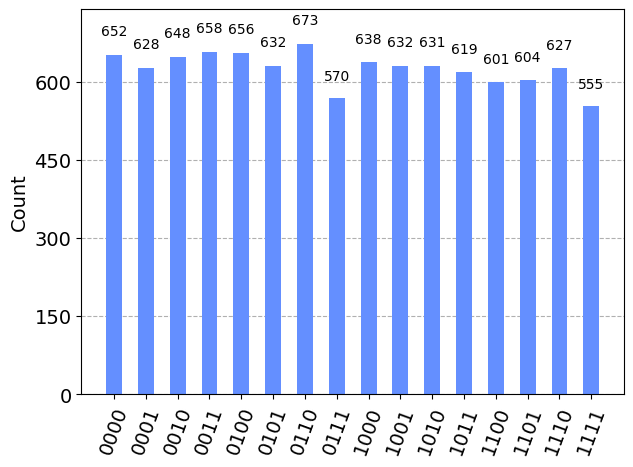

In [152]:
#generate hist
from qiskit import Aer
from qiskit.visualization import plot_histogram

meas = QuantumCircuit(qubits, qubits)
meas.measure(range(qubits), range(qubits))
circ = meas.compose(qc, range(qubits), front=True)

# Run the quantum circuit on a statevector simulator backend
backend_sim = Aer.get_backend('qasm_simulator')

# Execute the circuit on the qasm simulator.
job_sim = backend_sim.run(transpile(circ, backend_sim), shots=10024)

# Grab the results from the job.
result_sim = job_sim.result()

counts = result_sim.get_counts(circ)

plot_histogram(counts)